
Integrantes:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

### **Carga de datos**

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import os.path

In [2]:
RANDOM_STATE = 813

In [3]:
def genera_df(ficherocsv, nro_filas=None):
    try:
      from google.colab import drive
      drive.mount('/content/drive')
      df = pd.read_csv(os.path.join('drive/MyDrive/Colab Notebooks/',ficherocsv), nrows=nro_filas)
    except:   # si no es en google colab, se supone que estamos ejecutando el notebook en nuestro servidor local y que el fichero está en el mismo directorio
      df = pd.read_csv(ficherocsv, nrows=nro_filas)
    return df

In [4]:
fdatos = 'heart.csv'

df = genera_df(fdatos)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Comprobamos si existen valores nulos en el dataframe

In [5]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

# LabelEncoder
Usamos el LabelEncoder para pasar las variables catégoricas a numericas

In [7]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [8]:
X = df_label.drop(['HeartDisease'], axis=1).values
Y = df_label['HeartDisease'].values



In [9]:
X_train_label, X_test_label, Y_train_label, Y_test_label = train_test_split(X, Y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, Y_train_label, Y_val_label = train_test_split(X_train_label, Y_train_label, test_size=0.1, random_state = RANDOM_STATE)

### **Escalar datos**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_label= scaler.fit_transform(X_train_label)

X_test_label= scaler.transform(X_test_label)

X_val_label= scaler.transform(X_val_label)

### **Entrenamiento con diferentes parámetros**

In [11]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |






In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [13]:
# Table structure
results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Traing model
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_label, Y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = classifier_svc.predict(X_test_label)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.5760869565217391 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.8586956521739131 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.8586956521739131 
 
Entrenando... ke

In [14]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

,kernel,c,accuracy
0,linear,0.00001,0.521739
1,linear,0.00010,0.521739
2,linear,0.00100,0.826087
3,linear,0.01000,0.826087
4,linear,0.10000,0.826087
5,linear,1.00000,0.826087
6,poly,0.00001,0.521739
7,poly,0.00010,0.521739
8,poly,0.00100,0.521739
9,poly,0.01000,0.576087


**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [15]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,kernel,c,accuracy
17,rbf,1.000,0.869565
10,poly,0.100,0.858696
11,poly,1.000,0.858696
2,linear,0.001,0.826087
3,linear,0.010,0.826087
4,linear,0.100,0.826087
5,linear,1.000,0.826087
21,sigmoid,0.010,0.826087
22,sigmoid,0.100,0.815217
23,sigmoid,1.000,0.804348


In [16]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'rbf', 'C': 1.0}

Entrenamos el modelo con la mejor combinación de hiperparámetros

In [17]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_label,Y_train_label)
prediction = classifier_svc.predict(X_test_label)

### **Análisis con el mejor de los casos**

Precisión (Acurracy) :  86.96%
Puntuación de validación cruzada (Cross Validation Score) con Train :  92.23%
Puntuación de validación cruzada (Cross Validation Score) con Val:  93.26%
Puntuación ROC_AUC :  86.93%


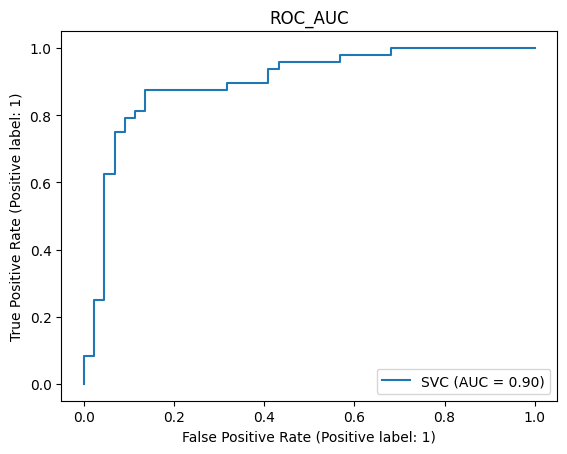

In [18]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(Y_test_label,prediction)))
print("Puntuación de validación cruzada (Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_label,Y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada (Cross Validation Score) con Val: ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_label,Y_val_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(Y_test_label,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_label,Y_test_label)

plt.title('ROC_AUC')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.88      0.88      0.88        48

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



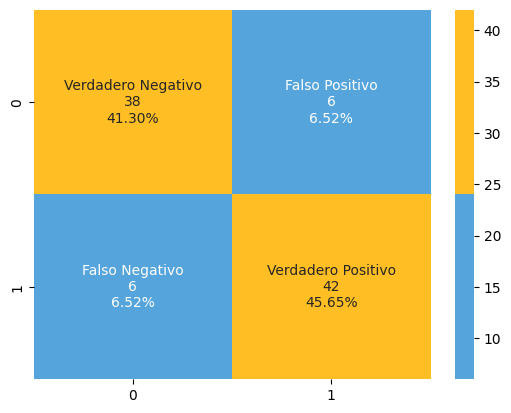

In [19]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(Y_test_label,classifier_svc.predict(X_test_label))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(Y_test_label,classifier_svc.predict(X_test_label)))

# **One Hot Encoder**

### **Aplicar One Hot Encoder**

In [20]:
categ_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
df_oneHot=pd.get_dummies(df,columns=categ_columns,drop_first=False)
df_oneHot.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### **Preparar datos**

In [21]:
X = df_oneHot.drop(['HeartDisease'], axis=1).values
Y = df_oneHot['HeartDisease'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train_OH, X_test_OH, Y_train_OH, Y_test_OH = train_test_split(X, Y, test_size=0.1, random_state = RANDOM_STATE)
X_train_OH, X_val_OH, Y_train_OH, Y_val_OH = train_test_split(X_train_OH, Y_train_OH, test_size=0.1, random_state = RANDOM_STATE)

X_train_OH.shape, X_test_OH.shape, X_val_OH.shape

((743, 20), (92, 20), (83, 20))

### **Escalar datos**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_OH= scaler.fit_transform(X_train_OH)

X_test_OH= scaler.transform(X_test_OH)

X_val_OH= scaler.transform(X_val_OH)

###**Entrenamiento con diferentes parámetros**

In [24]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |






In [25]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [26]:
# Table structure
from sklearn.svm import SVC

results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Traing model
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_OH, Y_train_OH)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = classifier_svc.predict(X_test_OH)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_OH,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.8369565217391305 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8369565217391305 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8586956521739131 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8586956521739131 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.5434782608695652 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.8695652173913043 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.8804347826086957 
 
Entrenando... ke

In [27]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

,kernel,c,accuracy
0,linear,0.00001,0.521739
1,linear,0.00010,0.521739
2,linear,0.00100,0.836957
3,linear,0.01000,0.836957
4,linear,0.10000,0.858696
5,linear,1.00000,0.858696
6,poly,0.00001,0.521739
7,poly,0.00010,0.521739
8,poly,0.00100,0.521739
9,poly,0.01000,0.543478


**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [28]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,kernel,c,accuracy
11,poly,1.000,0.880435
10,poly,0.100,0.869565
4,linear,0.100,0.858696
5,linear,1.000,0.858696
17,rbf,1.000,0.847826
2,linear,0.001,0.836957
3,linear,0.010,0.836957
21,sigmoid,0.010,0.836957
22,sigmoid,0.100,0.826087
23,sigmoid,1.000,0.826087


In [29]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'poly', 'C': 1.0}

Entrenamos el modelo con la mejor combinación de hiperparámetros

In [30]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_OH,Y_train_OH)
prediction = classifier_svc.predict(X_test_OH)

### **Análisis con el mejor de los casos**

Precisión (Acurracy) :  88.04%
Puntuación de validación cruzada(Cross Validation Score) con Train :  90.64%
Puntuación de validación cruzada(Cross Validation Score) con Val :  91.81%
Puntuación ROC_AUC :  87.97%


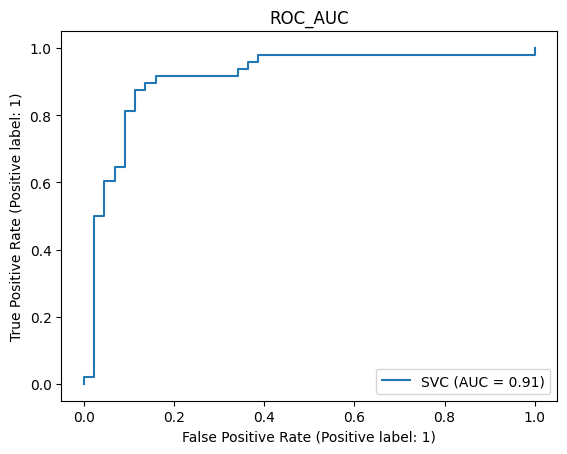

In [31]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(Y_test_OH,prediction)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_OH,Y_train_OH,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_OH,Y_val_OH, cv = cv ,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(Y_test_OH,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_OH,Y_test_OH)

plt.title('ROC_AUC')
plt.show()

**Matriz confusion**

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.88      0.90      0.89        48

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



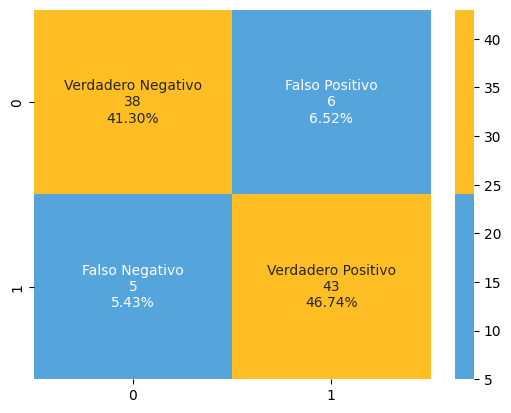

In [32]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(Y_test_OH,classifier_svc.predict(X_test_OH))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(Y_test_OH,classifier_svc.predict(X_test_OH)))